In [1]:
import os
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import math
import warnings
import operator
import re

'''
My Own Algorithms Import
'''
from preprocessing.scaler import MinMaxScaler, StandardScaler
from preprocessing.pca import PCA
from analysis.confusion_matrix import ConfusionMatrix
from analysis.roc import ROC
from supervisedLearningAlgorithms.naive_bayes_classifier import NaiveBayes

#Ignore Warnings
warnings.filterwarnings("ignore")

#read data
golf_data = pd.read_csv('data-sets/golf-weather.csv')
interview_data = pd.read_csv('data-sets/interview.csv')

#randomize data with given seed
golf_data = golf_data.reindex(np.random.RandomState(seed=42).permutation(golf_data.index))
interview_data = interview_data.reindex(np.random.RandomState(seed=42).permutation(interview_data.index))

# Naive Bayes Classifier with Golf-Weather Data

# Analyze the Data

In [2]:
golf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 9 to 6
Data columns (total 5 columns):
Outlook     14 non-null object
Temp        14 non-null object
Humidity    14 non-null object
Windy       14 non-null object
Play        14 non-null object
dtypes: object(5)
memory usage: 672.0+ bytes


In [3]:
golf_data.head()

,Outlook,Temp,Humidity,Windy,Play
9,Sunny,Mild,Normal,f,yes
11,Overcast,Mild,High,t,yes
0,Rainy,Hot,High,f,no
12,Overcast,Hot,Normal,f,yes
5,Sunny,Cool,Normal,t,no


## Manipulate Data

In [4]:
golf_data['Windy'] = [False if w=="f" else True for w in golf_data['Windy']]

## Set Up Data

In [5]:
seventy_five__percentile = int(len(golf_data)*0.75) 
x_train, y_train = golf_data.drop(['Play'], axis=1)[:seventy_five__percentile], golf_data['Play'][:seventy_five__percentile]
x_test, y_test = golf_data.drop(['Play'], axis=1)[seventy_five__percentile:], golf_data['Play'][seventy_five__percentile:]
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

## Naive Bayes Classifier

In [6]:
naive_bayes = NaiveBayes()
naive_bayes.fit(x_train, y_train.values)
predictions = naive_bayes.predict(x_test)
predictions

['no', 'no', 'yes', 'yes']

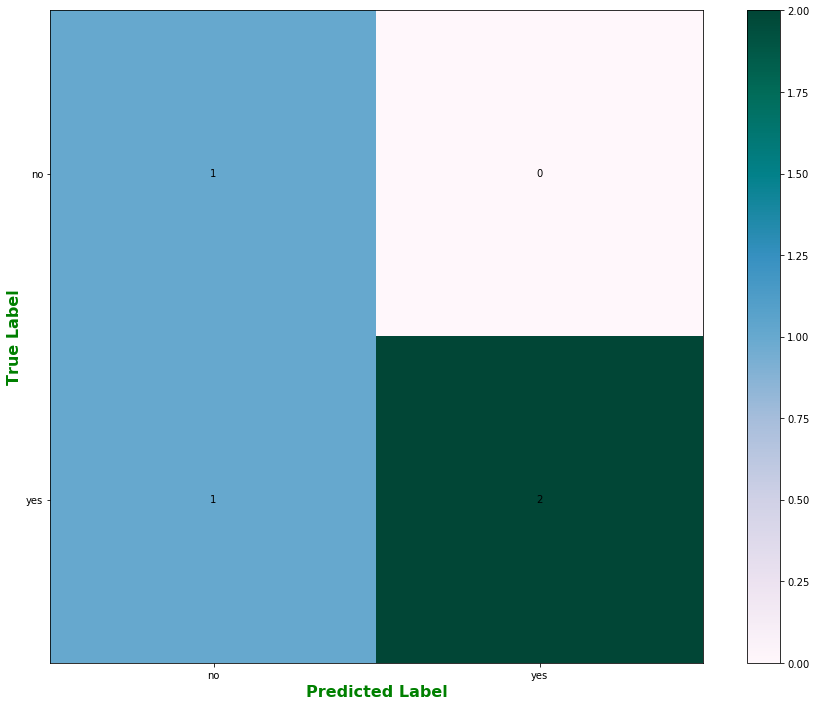

In [7]:
confusion_matrix = ConfusionMatrix()
confusion_matrix.fit(predictions, y_test.values)
confusion_matrix.plot()

# Naive Bayes Classifier with Interview Attendance Data

## Analyze the Data

In [8]:
interview_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 753 to 1126
Data columns (total 28 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                 

## Undecided For Yes/No questions

In [9]:
def fillColumns(df, columns, value):
    for column in columns:
        df[column] = df[column].replace(np.nan, value)

In [10]:
fillColumns(interview_data, ['Have you obtained the necessary permission to start at the required time', 'Hope there will be no unscheduled meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same', 'Are you clear with the venue details and the landmark.', 'Has the call letter been shared'], 'Unknown')
fillColumns(interview_data, ['Expected Attendance'], 'Uncertain')

In [11]:
interview_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 753 to 1126
Data columns (total 28 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                 

## Remove empty values and unnecessary columns

In [12]:
interview_data.dropna(axis=1, how='all', inplace=True)
interview_data.dropna(inplace=True)

In [13]:
interview_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 753 to 1126
Data columns (total 23 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1233 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                 

In [14]:
interview_data.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
753,06.02.2016,Standard Chartered Bank,BFSI,Chennai,Routine,JAVA/J2EE/Struts/Hibernate,Scheduled Walk In,Candidate 754,Female,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Married
582,02.09.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walk In,Candidate 583,Female,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
548,02.09.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walk In,Candidate 549,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Married
113,25.05.16,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 114,Female,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
174,04/12/16,Standard Chartered Bank,BFSI,Bangalore,Routine,Fresher,Walkin,Candidate 175,Male,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single


## Analyze Column values

In [15]:
def df_unique_labels(df, column):
    return np.unique(df[column].values)

def stripAndLower(df, column):
    df[column] = [val.strip().lower() for val in df[column]]

Observed Attendance

In [16]:
stripAndLower(interview_data, 'Observed Attendance')

In [17]:
df_unique_labels(interview_data, 'Observed Attendance')

array(['no', 'yes'], dtype=object)

Expected Attendance

In [18]:
stripAndLower(interview_data, 'Expected Attendance')

In [19]:
df_unique_labels(interview_data, 'Expected Attendance')

array(['10.30 am', '11:00 am', 'no', 'uncertain', 'yes'], dtype=object)

Client name

In [20]:
df_unique_labels(interview_data, 'Client name')

array(['ANZ', 'Aon Hewitt', 'Aon hewitt Gurgaon', 'Astrazeneca',
       'Barclays', 'Flextronics', 'Hewitt', 'Hospira', 'Pfizer',
       'Prodapt', 'Standard Chartered Bank',
       'Standard Chartered Bank Chennai', 'UST', 'Williams Lea',
       'Woori Bank'], dtype=object)

Industry

In [21]:
df_unique_labels(interview_data, 'Industry')

array(['BFSI', 'Electronics', 'IT', 'IT Products and Services',
       'IT Services', 'Pharmaceuticals', 'Telecom'], dtype=object)

Location

In [22]:
df_unique_labels(interview_data, 'Location')

array(['- Cochin- ', 'Bangalore', 'CHENNAI', 'Chennai', 'Delhi',
       'Gurgaon', 'Gurgaonr', 'Hyderabad', 'Noida', 'chennai', 'chennai '],
      dtype=object)

Position to be closed

In [23]:
df_unique_labels(interview_data, 'Position to be closed')

array(['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine',
       'Selenium testing', 'Trade Finance'], dtype=object)

Nature of Skillset

In [24]:
df_unique_labels(interview_data, 'Nature of Skillset')

array(['- SAPBO, Informatica', '10.00 AM', '11.30 AM', '11.30 Am',
       '12.30 Pm', '9.00 Am', '9.30 AM', 'ALS Testing', 'AML/KYC/CDD',
       'Accounting Operations', 'Analytical R & D', 'Analytical R&D',
       'Automation Testing Java', 'Banking Operations',
       'Banking operations', 'BaseSAS Program/ Reporting', 'Biosimilars',
       'Biosimiliars', 'Biosimillar', 'CDD KYC', 'COTS', 'COTS Developer',
       'Core Java', 'Dot Net', 'EMEA', 'ETL', 'Fresher',
       'Global Labelling', 'Hadoop', 'JAVA, J2ee', 'JAVA,J2ee',
       'JAVA,SQL', 'JAVA/J2EE', 'JAVA/J2EE/Struts/Hibernate',
       'JAVA/SPRING/HIBERNATE/JSF', 'Java', 'Java ', 'Java ,J2ee',
       'Java Developer', 'Java J2EE', 'Java J2ee', 'Java JSF',
       'Java Tech Lead', 'Java, J2Ee', 'Java, SQL',
       'Java, Spring, Hibernate', 'Java, XML, Struts, hibernate',
       'Java,J2EE', 'Java,J2ee, JSF', 'Java,SQL', 'Java,spring,hibernate',
       'Java-SAS', 'Java/J2ee', 'Java/J2ee/Core Java', 'L & L',
       'LCM -Mana

Interview Type

In [25]:
df_unique_labels(interview_data, 'Interview Type')

array(['Sceduled walkin', 'Scheduled ', 'Scheduled Walk In',
       'Scheduled Walkin', 'Walkin', 'Walkin '], dtype=object)

Candidate Current Location

In [26]:
df_unique_labels(interview_data, 'Candidate Current Location')

array(['- Cochin- ', 'Bangalore', 'CHENNAI', 'Chennai', 'Delhi',
       'Gurgaon', 'Hyderabad', 'Noida', 'chennai', 'chennai '],
      dtype=object)

Candidate Job Location

In [27]:
df_unique_labels(interview_data, 'Candidate Job Location')

array(['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Noida',
       'Visakapatinam'], dtype=object)

Interview Venue

In [28]:
df_unique_labels(interview_data, 'Interview Venue')

array(['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur',
       'Hyderabad', 'Noida'], dtype=object)

Candidate Native location

In [29]:
df_unique_labels(interview_data, 'Candidate Native location')

array(['- Cochin- ', 'Agra', 'Ahmedabad', 'Allahabad', 'Ambur',
       'Anantapur', 'Baddi', 'Bangalore', 'Belgaum', 'Bhubaneshwar',
       'Chandigarh', 'Chennai', 'Chitoor', 'Cochin', 'Coimbatore',
       'Cuttack', 'Delhi', 'Delhi /NCR', 'Faizabad', 'Ghaziabad',
       'Gurgaon', 'Hissar', 'Hosur', 'Hyderabad', 'Kanpur', 'Kolkata',
       'Kurnool', 'Lucknow', 'Mumbai', 'Mysore', 'Nagercoil', 'Noida',
       'Panjim', 'Patna', 'Pondicherry', 'Pune', 'Salem', 'Tanjore',
       'Tirupati', 'Trichy', 'Trivandrum', 'Tuticorin', 'Vellore',
       'Vijayawada', 'Visakapatinam', 'Warangal'], dtype=object)

## Merge similar values in column

Client name

In [30]:
def mergeValues(val, valuesToConvert, valuesConvertedTo):
    if (val in valuesToConvert):
        return valuesConvertedTo
    else:
        return val
    
def mergeIfContains(val, substring, resultingLabel = None):
    if (resultingLabel == None):
        resultingLabel = substring
    if (substring.lower().strip() in val.lower().strip()):
        return resultingLabel
    else:
        return val
    
def cleanOtherValues(val, valuesWanted, otherLabel = "Others"):
    lower_vals = [x.lower() for x in valuesWanted]
    if (val.lower() not in lower_vals):
        return otherLabel
    else:
        return val

In [31]:
interview_data['Client name'] = interview_data['Client name'].apply(mergeIfContains, substring = 'Hewitt')

In [32]:
interview_data['Client name'] = interview_data['Client name'].apply(mergeIfContains, substring = 'Standard Chartered Bank')

In [33]:
df_unique_labels(interview_data, 'Client name')

array(['ANZ', 'Astrazeneca', 'Barclays', 'Flextronics', 'Hewitt',
       'Hospira', 'Pfizer', 'Prodapt', 'Standard Chartered Bank', 'UST',
       'Williams Lea', 'Woori Bank'], dtype=object)

Industry

In [34]:
interview_data['Industry'] = interview_data['Industry'].apply(mergeIfContains, substring='IT')
interview_data['Industry'] = interview_data['Industry'].apply(mergeIfContains, substring='Electronics', resultingLabel = 'IT')
interview_data['Industry'] = interview_data['Industry'].apply(mergeIfContains, substring='Electronics', resultingLabel = 'Telecom')

In [35]:
df_unique_labels(interview_data, 'Industry')

array(['BFSI', 'IT', 'Pharmaceuticals', 'Telecom'], dtype=object)

Location

In [36]:
interview_data['Location'] = interview_data['Location'].apply(mergeIfContains, substring='Chennai')
df_unique_labels(interview_data, 'Location')

array(['- Cochin- ', 'Bangalore', 'Chennai', 'Delhi', 'Gurgaon',
       'Gurgaonr', 'Hyderabad', 'Noida'], dtype=object)

Position to be closed

In [37]:
interview_data['Position to be closed'] = interview_data['Position to be closed'].apply(mergeIfContains, substring='Dot Net', resultingLabel = 'Routine')
interview_data['Position to be closed'] = interview_data['Position to be closed'].apply(mergeIfContains, substring='Trade Finance', resultingLabel = 'Niche')
interview_data['Position to be closed'] = interview_data['Position to be closed'].apply(mergeIfContains, substring='AML', resultingLabel = 'Niche')
interview_data['Position to be closed'] = interview_data['Position to be closed'].apply(mergeIfContains, substring='Selenium testing', resultingLabel = 'Routine')
interview_data['Position to be closed'] = interview_data['Position to be closed'].apply(mergeIfContains, substring='Production- Sterile', resultingLabel = 'Routine')
df_unique_labels(interview_data, 'Position to be closed')

array(['Niche', 'Routine'], dtype=object)

Nature of Skillset

In [38]:
df_unique_labels(interview_data, 'Nature of Skillset')

array(['- SAPBO, Informatica', '10.00 AM', '11.30 AM', '11.30 Am',
       '12.30 Pm', '9.00 Am', '9.30 AM', 'ALS Testing', 'AML/KYC/CDD',
       'Accounting Operations', 'Analytical R & D', 'Analytical R&D',
       'Automation Testing Java', 'Banking Operations',
       'Banking operations', 'BaseSAS Program/ Reporting', 'Biosimilars',
       'Biosimiliars', 'Biosimillar', 'CDD KYC', 'COTS', 'COTS Developer',
       'Core Java', 'Dot Net', 'EMEA', 'ETL', 'Fresher',
       'Global Labelling', 'Hadoop', 'JAVA, J2ee', 'JAVA,J2ee',
       'JAVA,SQL', 'JAVA/J2EE', 'JAVA/J2EE/Struts/Hibernate',
       'JAVA/SPRING/HIBERNATE/JSF', 'Java', 'Java ', 'Java ,J2ee',
       'Java Developer', 'Java J2EE', 'Java J2ee', 'Java JSF',
       'Java Tech Lead', 'Java, J2Ee', 'Java, SQL',
       'Java, Spring, Hibernate', 'Java, XML, Struts, hibernate',
       'Java,J2EE', 'Java,J2ee, JSF', 'Java,SQL', 'Java,spring,hibernate',
       'Java-SAS', 'Java/J2ee', 'Java/J2ee/Core Java', 'L & L',
       'LCM -Mana

In [39]:
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Java')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='SCCM')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Analytical', resultingLabel = "Analytical R&D")
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Manager')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Tech lead', resultingLabel = 'Technical Lead')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Oracle')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='L & L', resultingLabel = 'Lending & Liability')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Lending And Liabilities', resultingLabel = 'Lending & Liability')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Lending&Liablities', resultingLabel = 'Lending & Liability')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='COTS')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='Testing')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='AML', resultingLabel = 'CDD')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='KYC', resultingLabel = 'CDD')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(mergeIfContains, substring='CDD')
interview_data['Nature of Skillset'] = interview_data['Nature of Skillset'].apply(cleanOtherValues, valuesWanted = ['Java', 'CDD', 'Accounting Operations', 'Fresher', 'Oracle'])

In [40]:
df_unique_labels(interview_data, 'Nature of Skillset')

array(['Accounting Operations', 'CDD', 'Fresher', 'Java', 'Oracle',
       'Others'], dtype=object)

In [41]:
interview_data['Nature of Skillset'].value_counts()

Java                     459
Others                   398
CDD                      136
Fresher                   86
Accounting Operations     86
Oracle                    68
Name: Nature of Skillset, dtype: int64

Interview Type

In [42]:
interview_data['Interview Type'] = interview_data['Interview Type'].apply(mergeIfContains, substring='Scheduled Walkin', resultingLabel='Scheduled Walk In')
interview_data['Interview Type'] = interview_data['Interview Type'].apply(mergeIfContains, substring='Walkin', resultingLabel='Walkin')
df_unique_labels(interview_data, 'Interview Type')

array(['Scheduled ', 'Scheduled Walk In', 'Walkin'], dtype=object)

Candidate Current Location

In [43]:
interview_data['Candidate Current Location'].value_counts()

Chennai       754
Bangalore     292
chennai        86
Hyderabad      38
Gurgaon        34
Noida          15
- Cochin-       9
chennai         3
CHENNAI         1
Delhi           1
Name: Candidate Current Location, dtype: int64

In [44]:
interview_data['Candidate Current Location'] = interview_data['Candidate Current Location'].apply(mergeIfContains, substring='Chennai')
interview_data['Candidate Current Location'] = interview_data['Candidate Current Location'].apply(mergeIfContains, substring='Delhi', resultingLabel='Capital Region')
interview_data['Candidate Current Location'] = interview_data['Candidate Current Location'].apply(mergeIfContains, substring='Noida', resultingLabel='Capital Region')
interview_data['Candidate Current Location'] = interview_data['Candidate Current Location'].apply(mergeIfContains, substring='Gurgaon', resultingLabel='Capital Region')
interview_data['Candidate Current Location'].value_counts()

Chennai           844
Bangalore         292
Capital Region     50
Hyderabad          38
- Cochin-           9
Name: Candidate Current Location, dtype: int64

Candidate Job Location

In [45]:
interview_data['Candidate Job Location'].value_counts()

Chennai          893
Bangalore        259
Gurgaon           35
Visakapatinam     21
Noida             15
- Cochin-          9
Hosur              1
Name: Candidate Job Location, dtype: int64

In [46]:
interview_data['Candidate Job Location'] = interview_data['Candidate Job Location'].apply(mergeIfContains, substring='Chennai')
interview_data['Candidate Job Location'] = interview_data['Candidate Job Location'].apply(mergeIfContains, substring='Delhi', resultingLabel='Capital Region')
interview_data['Candidate Job Location'] = interview_data['Candidate Job Location'].apply(mergeIfContains, substring='Noida', resultingLabel='Capital Region')
interview_data['Candidate Job Location'] = interview_data['Candidate Job Location'].apply(mergeIfContains, substring='Gurgaon', resultingLabel='Capital Region')
interview_data['Candidate Job Location'].value_counts()

Chennai           893
Bangalore         259
Capital Region     50
Visakapatinam      21
- Cochin-           9
Hosur               1
Name: Candidate Job Location, dtype: int64

Interview Venue

In [47]:
interview_data['Interview Venue'] = interview_data['Interview Venue'].apply(mergeIfContains, substring='Chennai')
interview_data['Interview Venue'] = interview_data['Interview Venue'].apply(mergeIfContains, substring='Delhi', resultingLabel='Capital Region')
interview_data['Interview Venue'] = interview_data['Interview Venue'].apply(mergeIfContains, substring='Noida', resultingLabel='Capital Region')
interview_data['Interview Venue'] = interview_data['Interview Venue'].apply(mergeIfContains, substring='Gurgaon', resultingLabel='Capital Region')
interview_data['Interview Venue'].value_counts()

Chennai           852
Bangalore         277
Capital Region     50
Hyderabad          40
- Cochin-           9
Hosur               5
Name: Interview Venue, dtype: int64

Same Locations

In [48]:
def sameLocation(df, column1, column2, column3):
    return ((df[column1] == df[column2]) == df[column3])

In [49]:
interview_data['Job Location is the same as Candidate Location'] = sameLocation(interview_data, 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue')
interview_data['Job Location is the same as Candidate Location'].head()

753    False
582    False
548    False
113    False
174    False
Name: Job Location is the same as Candidate Location, dtype: bool

## Drop location columns

In [50]:
interview_data = interview_data.drop(['Candidate Current Location', 'Candidate Job Location', 'Location', 'Candidate Native location', 'Interview Venue'], axis=1)

## Most common attributes for Interview Data

## Set up Data

In [51]:
seventy_five__percentile = int(len(interview_data)*0.75) 
x_train, y_train = interview_data.drop(['Observed Attendance'], axis=1)[:seventy_five__percentile], interview_data['Observed Attendance'][:seventy_five__percentile]
x_test, y_test = interview_data.drop(['Observed Attendance'], axis=1)[seventy_five__percentile:], interview_data['Observed Attendance'][seventy_five__percentile:]
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

## Fit Data

In [52]:
naive_bayes = NaiveBayes()
naive_bayes.fit(x_train, y_train.values)

## Predict Data

In [53]:
predictions = naive_bayes.predict(x_test)

## Confusion Matrix

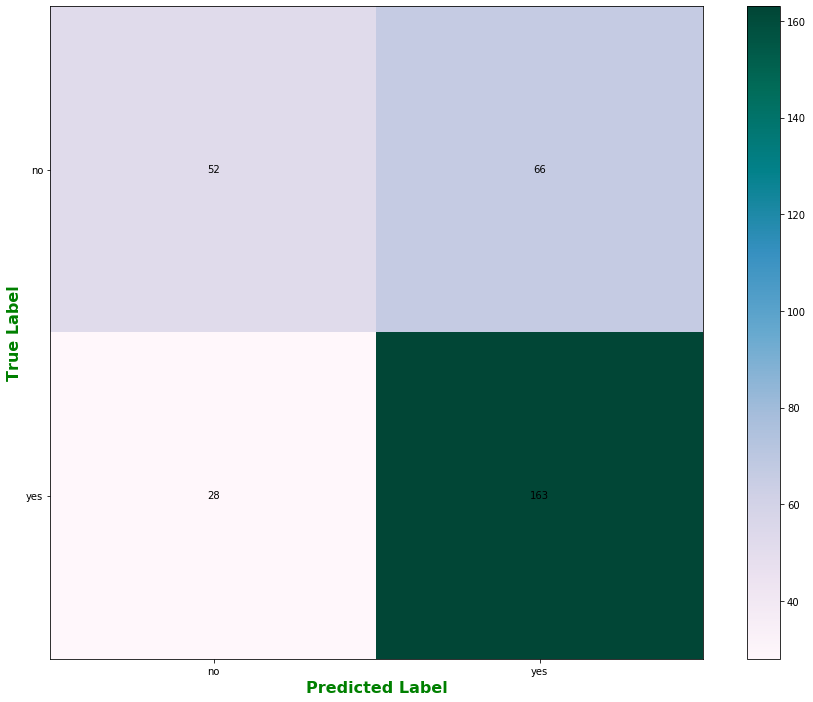

In [54]:
confusion_matrix = ConfusionMatrix()
confusion_matrix.fit(predictions, y_test.values)
confusion_matrix.plot()

measurements for no attendance

In [55]:
confusion_matrix.measurements("no")

Confusion Matrix label measurements for  no
Accuracy rate 0.6957928802588996
Error rate 0.3042071197411004
Recall 0.4406779661016949
False Positive Rate 0.14659685863874344
True Negative Rate 0.5593220338983051
Precision 0.65
Prevalence 0.3818770226537217
Matthews Correlation Coefficient 0.32618356710102525


measurements for yes attendance

In [56]:
confusion_matrix.measurements("yes")

Confusion Matrix label measurements for  yes
Accuracy rate 0.6957928802588996
Error rate 0.3042071197411004
Recall 0.8534031413612565
False Positive Rate 0.559322033898305
True Negative Rate 0.1465968586387435
Precision 0.7117903930131004
Prevalence 0.6181229773462783
Matthews Correlation Coefficient 0.32618356710102525


## Roc Curve for no attendance

In [57]:
roc = ROC()

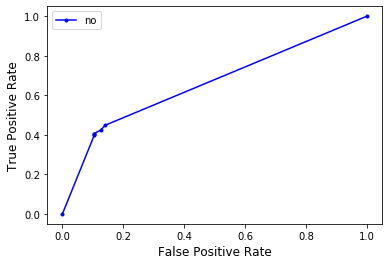

In [58]:
probs_score = naive_bayes.predict_probability(x_test, 'no')
roc.plot('no', probs_score, y_test.values)

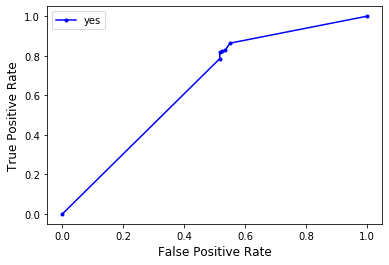

In [59]:
probs_score = naive_bayes.predict_probability(x_test, 'yes')
roc.plot('yes', probs_score, y_test.values)